# Initializing

## Importing the associated modules

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import functools
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics, linear_model, ensemble, neural_network, svm, dummy
from helpers import *

# Importing the different features
from ema_features import get_EMA_features_and_target_for_patient
from module_features import get_module_features_for_patient
from context_features import get_weekend_days

# Importing the machine learning module
from predicting import train_algorithms, test_algorithms, eval_algorithms, plot_algorithms, make_algorithms
from feature_selection import backward_selection, forward_selection, correlate_features, precalculated_feature_selection

# Importing multiple patient wrapper
from individual_wrappers import *

## Initializing constants

In [3]:
SLIDING_WINDOW = 7
RIDGE_ALPHAS = (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7)
LASSO_ALPHAS = (0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5)
MAX_PATIENTS = 10
FEATURE_PATH = "data/features/"

## Defining our Machine Learning Algorithms

In [4]:
ml_algorithms = [
    {
        "name": "Lasso",
        "model": linear_model.LassoCV(alphas=LASSO_ALPHAS)
    },
    {
        "name": "Ridge",
        "model": linear_model.RidgeCV(alphas=RIDGE_ALPHAS)
    },
    {
        "name": "Random Forest",
        "model": ensemble.RandomForestRegressor(n_estimators=1000, max_depth=2)
    },
    {
        "name": "Dummy Mean Regressor",
        "model": dummy.DummyRegressor()
    },
    {
        "name": "SVR RBF",
        "model": svm.SVR()
    }
]

## Initializing patients

In [5]:
proper_patients = get_proper_patients(MAX_PATIENTS)

# Methodology

### Retrieving the working patients

In [6]:
sample_patients = load_patients_object(proper_patients[1:6], '_top5_featureselection_')

## Condition A: Per-patient

## Training and testing the models

/Users/jonathanmitnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanmitnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanmitnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanmitnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

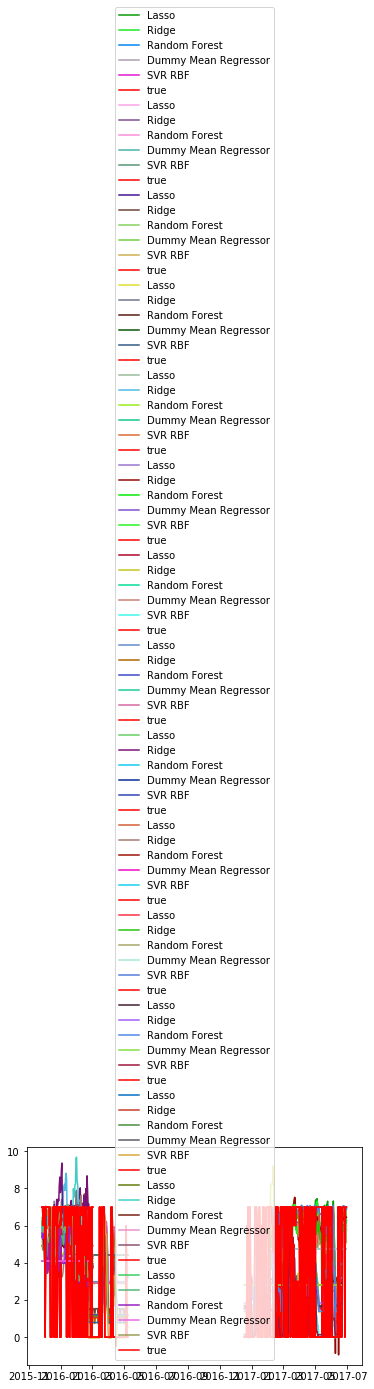

In [7]:
patients_scores = learn_patients_setups(sample_patients, ml_algorithms)

In [30]:
# calc_avg_performance_from_models(ml_algorithms, patients_scores[0])

patients_scores[1]

[{'MAE': [{'model_mae': 1.8777716715791306, 'model_name': 'Lasso'},
   {'model_mae': 1.9681453166917355, 'model_name': 'Ridge'},
   {'model_mae': 1.9579489915320631, 'model_name': 'Random Forest'},
   {'model_mae': 2.520857513483989, 'model_name': 'Dummy Mean Regressor'},
   {'model_mae': 1.5265262070202781, 'model_name': 'SVR RBF'}],
  'explained_var': [{'model_explained_var': -3.0108187114698675,
    'model_name': 'Lasso'},
   {'model_explained_var': -6.1532927984094741, 'model_name': 'Ridge'},
   {'model_explained_var': -4.5882122747519478, 'model_name': 'Random Forest'},
   {'model_explained_var': 0.0, 'model_name': 'Dummy Mean Regressor'},
   {'model_explained_var': -1.8914997412343308, 'model_name': 'SVR RBF'}],
  'feature_selection': 'true',
  'patient_id': '102318',
  'pearson_correlated_features': (['avg_average_ema_q_3_7_days',
    'avg_count_ema_q_3_7_days',
    'avg_count_ema_q_4_7_days',
    'avg_prior_engagement_7_days',
    'avg_count_ema_q_1_7_days',
    'std_average_em

## Condition B: Population-based

## Feature Selection

In [ ]:
top_features = create_patient_features(proper_patients[1:4], ml_algorithms, max_features=20)

# Evaluation

In [230]:
end_results = learn_patients_setups(sample_scores, ml_algorithms, max_features=20)

/Users/jonathanmitnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanmitnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanmitnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jonathanmitnik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Conv

### Convert the performance results to one DataFrame

In [248]:
topf_avg_performance = calc_avg_performance_from_models(ml_algorithms, end_results[0])
fcorrelation_avg_performance = calc_avg_performance_from_models(ml_algorithms, end_results[1])
allf_avg_performance = calc_avg_performance_from_models(ml_algorithms, end_results[2])
topf_df = pd.DataFrame(topf_avg_performance)
topf_df['feature_setup'] = pd.Series(['top_features' for i in range(1, len(topf_avg_performance) + 1)])

allf_df = pd.DataFrame(allf_avg_performance)
allf_df['feature_setup'] = pd.Series(['all_features' for i in range(1, len(allf_avg_performance) + 1)])
allf_df

corrf_df = pd.DataFrame(fcorrelation_avg_performance)
corrf_df['feature_setup'] = pd.Series(['corr_features' for i in range(1, len(fcorrelation_avg_performance) + 1)])

grouped_performances = topf_df.append(allf_df).append(corrf_df)
groupby_statement = grouped_performances.groupby('feature_setup').mean()
groupby_statement

,average_mae
feature_setup,
all_features,2.534200
corr_features,2.477782
top_features,2.491556
